In [79]:
# Google Driveと接続を行います。これを行うことで、Driveにあるデータにアクセスできるようになります。
# 下記セルを実行すると、Googleアカウントのログインを求められますのでログインしてください。
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import os
os.getcwd()

'/content/drive/My Drive/就活/選考記録/選考記録/NTTdocomo/python'

In [81]:
# 作業フォルダへの移動を行います。
# 人によって作業場所が異なるので、その場合作業場所を変更してください。
import os
os.chdir('/content/drive/MyDrive/就活/選考記録/選考記録/NTTdocomo/python') #ここを変更。

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
df_treat = pd.read_csv("data/CPID5436_treat.csv")
df_control = pd.read_csv("data/CPID5436_control.csv")

In [84]:
df_treat["treatment"]=1
df_control["treatment"]=0
df = pd.concat([df_treat,df_control],ignore_index=True)

In [85]:
df["DPOINTS_USE_CP"]=df["DPOINTS_USE_202407"]+df["DPOINTS_USE_202408"]+df["DPOINTS_USE_202409"]
df["DPOINTS_GIVE_CP"]=df["DPOINTS_GIVE_202407"]+df["DPOINTS_GIVE_202408"]+df["DPOINTS_GIVE_202409"]
df["DPAY_SETTLEMENT_AMOUNT_CP"]=df["DPAY_SETTLEMENT_AMOUNT_202407"]+df["DPAY_SETTLEMENT_AMOUNT_202408"]+df["DPAY_SETTLEMENT_AMOUNT_202409"]

df["GENDER"]=np.where(df["GENDER"]==1,1,np.where(df["GENDER"]==2,0,np.nan))

In [86]:
df.head()

,DPAY_SETTLEMENT_AMOUNT_202406,DPAY_SETTLEMENT_AMOUNT_202407,DPAY_SETTLEMENT_AMOUNT_202408,DPAY_SETTLEMENT_AMOUNT_202409,DPOINTS_USE_202406,DPOINTS_USE_202407,DPOINTS_USE_202408,DPOINTS_USE_202409,DPOINTS_GIVE_202406,DPOINTS_GIVE_202407,DPOINTS_GIVE_202408,DPOINTS_GIVE_202409,DCARD_USE_AMOUNT_202406,GENDER,AGE,treatment,DPOINTS_USE_CP,DPOINTS_GIVE_CP,DPAY_SETTLEMENT_AMOUNT_CP
0,140481,54396,83390,3567,2,217,3274,2569,344,421,128,75,80783,1.0,52,1,6060,624,141353
1,76516,6305,29880,82146,4198,3722,238,1760,457,393,368,370,149245,1.0,21,1,5720,1131,118331
2,108504,27883,25752,44144,4455,3587,1093,2944,247,236,486,57,98563,0.0,24,1,7624,779,97779
3,23154,1691,98317,82911,4098,2632,3768,2153,21,254,431,308,103867,0.0,23,1,8553,993,182919
4,6475,147056,97382,78732,4139,4411,585,3092,29,140,410,183,48151,1.0,64,1,8088,733,323170


In [87]:
#共変量
#共変量の標準化
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_cols = ["AGE","DPAY_SETTLEMENT_AMOUNT_202406","DPOINTS_USE_202406","DPOINTS_GIVE_202406","DCARD_USE_AMOUNT_202406"]

In [88]:
X_scalar = scalar.fit_transform(df[X_cols])#修正

# 修正：標準化した列を df に追加
df = df.copy()
for i, col in enumerate(X_cols):
    df[col + "_std"] = X_scalar[:, i]

In [89]:
#アウトカム、処置変数
df["Y"] = df["DPAY_SETTLEMENT_AMOUNT_CP"]  #決済金額をアウトカムにする場合
df["T"] = df["treatment"]

In [90]:
df[df["T"]==1]

,DPAY_SETTLEMENT_AMOUNT_202406,DPAY_SETTLEMENT_AMOUNT_202407,DPAY_SETTLEMENT_AMOUNT_202408,DPAY_SETTLEMENT_AMOUNT_202409,DPOINTS_USE_202406,DPOINTS_USE_202407,DPOINTS_USE_202408,DPOINTS_USE_202409,DPOINTS_GIVE_202406,DPOINTS_GIVE_202407,...,DPOINTS_USE_CP,DPOINTS_GIVE_CP,DPAY_SETTLEMENT_AMOUNT_CP,AGE_std,DPAY_SETTLEMENT_AMOUNT_202406_std,DPOINTS_USE_202406_std,DPOINTS_GIVE_202406_std,DCARD_USE_AMOUNT_202406_std,Y,T
0,140481,54396,83390,3567,2,217,3274,2569,344,421,...,6060,624,141353,0.473301,1.500254,-1.738098,0.647983,0.143637,141353,1
1,76516,6305,29880,82146,4198,3722,238,1760,457,393,...,5720,1131,118331,-1.622319,0.030528,1.155921,1.419260,1.706629,118331,1
2,108504,27883,25752,44144,4455,3587,1093,2944,247,236,...,7624,779,97779,-1.419517,0.765518,1.333176,-0.014087,0.549556,97779,1
3,23154,1691,98317,82911,4098,2632,3768,2153,21,254,...,8553,993,182919,-1.487118,-1.195572,1.086950,-1.556642,0.670646,182919,1
4,6475,147056,97382,78732,4139,4411,585,3092,29,140,...,8088,733,323170,1.284509,-1.578806,1.115228,-1.502038,-0.601353,323170,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,132242,146424,52925,107562,3355,2946,3761,2274,445,492,...,8981,1081,306911,-1.689919,1.310946,0.574496,1.337354,-1.580808,306911,1
1396,107733,48668,15212,74412,4762,1120,4616,1742,250,148,...,7478,712,138292,0.608502,0.747802,1.544917,0.006389,0.110465,138292,1
1397,40361,65685,98806,84379,1774,1362,3017,2174,121,317,...,6553,1075,248870,-0.270306,-0.800206,-0.515934,-0.874095,-0.399490,248870,1
1398,103309,23288,65703,19536,941,1695,2158,2961,110,52,...,6814,437,108527,1.352109,0.646152,-1.090462,-0.949176,-1.185574,108527,1


In [91]:
df[df["T"]==0]

,DPAY_SETTLEMENT_AMOUNT_202406,DPAY_SETTLEMENT_AMOUNT_202407,DPAY_SETTLEMENT_AMOUNT_202408,DPAY_SETTLEMENT_AMOUNT_202409,DPOINTS_USE_202406,DPOINTS_USE_202407,DPOINTS_USE_202408,DPOINTS_USE_202409,DPOINTS_GIVE_202406,DPOINTS_GIVE_202407,...,DPOINTS_USE_CP,DPOINTS_GIVE_CP,DPAY_SETTLEMENT_AMOUNT_CP,AGE_std,DPAY_SETTLEMENT_AMOUNT_202406_std,DPOINTS_USE_202406_std,DPOINTS_GIVE_202406_std,DCARD_USE_AMOUNT_202406_std,Y,T
1400,129342,12214,3336,16991,2212,778,4804,3058,178,441,...,8640,789,32541,-0.743510,1.244313,-0.213841,-0.485044,-0.974670,32541,0
1401,107639,69696,50169,111476,932,3253,2872,4607,45,319,...,10732,1045,231341,1.014106,0.745643,-1.096669,-1.392831,-0.484829,231341,0
1402,35474,115087,99501,94664,1546,1274,704,4553,170,469,...,6531,914,309252,0.067697,-0.912495,-0.673188,-0.539648,-0.031241,309252,0
1403,43754,15558,48115,100349,2429,1372,3261,3969,75,398,...,8602,770,164022,0.811304,-0.722245,-0.064174,-1.188067,1.557731,164022,0
1404,21623,137128,146710,84231,4800,3777,1974,1855,84,473,...,7606,1154,368069,-0.270306,-1.230750,1.571126,-1.126638,1.599784,368069,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,140003,25960,132391,108950,1126,2920,4596,4316,448,100,...,11832,481,267301,-0.811111,1.489271,-0.962865,1.357831,1.077775,267301,0
2796,104505,57794,76888,74164,187,2748,913,2093,96,46,...,5754,464,208846,-0.811111,0.673633,-1.610502,-1.044732,1.337193,208846,0
2797,68469,119521,21137,73975,4085,1389,4784,1911,9,66,...,8084,583,214633,1.487311,-0.154368,1.077984,-1.638547,1.568415,214633,0
2798,31089,135520,13412,91255,2766,1691,42,793,249,54,...,2526,708,240187,-1.013913,-1.013249,0.168257,-0.000436,-0.295293,240187,0


In [92]:
#傾向スコア（P(T=1|X)）の推定 with ロジスティック回帰
#アウトカム回帰（E[Y|T,X]）の推定 with ランダムフォレスト（処置群ごと）
#層化抽出法を使ったK-分割交差検証 (Stratified K-Fold CV)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold

X_cols = ["AGE_std","DPAY_SETTLEMENT_AMOUNT_202406_std",
          "DPOINTS_USE_202406_std","DPOINTS_GIVE_202406_std",
          "DCARD_USE_AMOUNT_202406_std","GENDER"]
#GridSearch：設定
param_grid_ps = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
    "max_iter": [2000]
}
param_grid_rf = {
    "n_estimators": [10, 50, 100, 150],
    "max_depth": [5, 10, 50, None],
    "max_features": ["sqrt", "log2", None]
}

#Stratified K-Fold：設定
K = 5
SEED=1024
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=SEED)

#インスタンス
base_ps_model = LogisticRegression(max_iter=2000, solver='liblinear')
base_outcome_model = RandomForestRegressor(random_state=SEED)

# クロスフィットで得られた予測値を格納
df["ps_hat"] = np.nan
df["mu0"] = np.nan
df["mu1"] = np.nan

#AUC、MSE、回帰係数、変数重要度を格納
ps_scores_list = []
outcome_scores_list = []
ps_coefs_list = []
rf_importances_list = []

for train_index, test_index in kf.split(df, df["T"]):
    df_train = df.iloc[train_index]
    df_test = df.iloc[test_index]

    #傾向スコア（P(T=1|X)）モデルの学習
    #GridSearch：cv=5
    ps_model = GridSearchCV(base_ps_model, param_grid_ps, cv=5, scoring='roc_auc',n_jobs=-1)
    ps_model.fit(df_train[X_cols], df_train["T"])
    #傾向スコア（P(T=1|X)）の推定
    ps_hat = ps_model.predict_proba(df_test[X_cols])[:, 1]
    df.loc[test_index, "ps_hat"] = ps_hat
    #AUC
    ps_scores_list.append(ps_model.best_score_)
    print(f"  Propensity Score Model AUC: {ps_model.best_score_:.4f}")
    #回帰係数
    ps_coefs_list.append(ps_model.best_estimator_.coef_[0])


    #アウトカム回帰（E[Y|T,X]）モデルの学習
    #GridSearch：cv=5
    X_aug_train = df_train[X_cols].copy()
    X_aug_train["T"] = df_train["T"]
    outcome_model = GridSearchCV(base_outcome_model, param_grid_rf, cv=3, scoring='neg_mean_squared_error')
    outcome_model.fit(X_aug_train, df_train["Y"])
    # MSE=(-1)*neg_mean_squared_error
    mse = -outcome_model.best_score_
    outcome_scores_list.append(mse)
    print(f"  Outcome Model MSE: {mse:.4f}  (RMSE: {np.sqrt(mse):.4f})")
    #重要度
    rf_importances_list.append(outcome_model.best_estimator_.feature_importances_)
    #アウトカム回帰の推定 (S-learner)
    # 全員が処置を受けた場合 (^E[Y|T=1,X])
    X_test_mu1 = df_test[X_cols].copy()
    X_test_mu1["T"] = 1
    mu1_hat = outcome_model.predict(X_test_mu1)
    df.loc[test_index, "mu1"] = mu1_hat
    # 全員が処置を受けない場合 (^E[Y|T=0,X])
    X_test_mu0 = df_test[X_cols].copy()
    X_test_mu0["T"] = 0
    mu0_hat = outcome_model.predict(X_test_mu0)
    df.loc[test_index, "mu0"] = mu0_hat

print("\n" + "="*50 + "\n")

#AUC、MSE
print("--- Overall Model Performance (Mean across Folds) ---")
print(f"Propensity Score Model AUC: {np.mean(ps_scores_list):.4f} (+/- {np.std(ps_scores_list):.4f})")
mean_mse = np.mean(outcome_scores_list)
std_mse = np.std(outcome_scores_list)
print(f"Outcome Model MSE: {mean_mse:.4f} (+/- {std_mse:.4f})")
print(f"Outcome Model RMSE: {np.sqrt(mean_mse):.4f}")
print("\n" + "="*50 + "\n")

# 傾向スコアモデルの回帰係数
df_ps_coefs = pd.DataFrame(ps_coefs_list, columns=X_cols)
df_ps_coefs_summary = pd.DataFrame({
    "Mean_Coef": df_ps_coefs.mean(),
    "Std_Coef": df_ps_coefs.std()
}).sort_values("Mean_Coef", ascending=False)

print("--- Propensity Score Model Coefficients (Logistic Regression) ---")
print(df_ps_coefs_summary)
print("\n" + "="*50 + "\n")


# アウトカムモデルの変数重要度
outcome_model_features = X_cols + ["T"]
df_rf_importances = pd.DataFrame(rf_importances_list, columns=outcome_model_features)
df_rf_importances_summary = pd.DataFrame({
    "Mean_Importance": df_rf_importances.mean(),
    "Std_Importance": df_rf_importances.std()
}).sort_values("Mean_Importance", ascending=False)

print("--- Outcome Model Feature Importances (Random Forest) ---")
print(df_rf_importances_summary)

  Propensity Score Model AUC: 0.5000
  Outcome Model MSE: 5681056024.9247  (RMSE: 75372.7804)
  Propensity Score Model AUC: 0.5000
  Outcome Model MSE: 5639493039.7275  (RMSE: 75096.5581)
  Propensity Score Model AUC: 0.5000
  Outcome Model MSE: 5721261493.5910  (RMSE: 75639.0210)
  Propensity Score Model AUC: 0.5088
  Outcome Model MSE: 5593366699.9953  (RMSE: 74788.8140)
  Propensity Score Model AUC: 0.5009
  Outcome Model MSE: 5709368171.5441  (RMSE: 75560.3611)


--- Overall Model Performance (Mean across Folds) ---
Propensity Score Model AUC: 0.5020 (+/- 0.0035)
Outcome Model MSE: 5668909085.9565 (+/- 47110967.2379)
Outcome Model RMSE: 75292.1582


--- Propensity Score Model Coefficients (Logistic Regression) ---
                                   Mean_Coef  Std_Coef
AGE_std                             0.000939  0.002136
DPOINTS_GIVE_202406_std            -0.000460  0.014637
DCARD_USE_AMOUNT_202406_std        -0.006300  0.008784
DPAY_SETTLEMENT_AMOUNT_202406_std  -0.011783  0.0166

In [93]:
df.head()

,DPAY_SETTLEMENT_AMOUNT_202406,DPAY_SETTLEMENT_AMOUNT_202407,DPAY_SETTLEMENT_AMOUNT_202408,DPAY_SETTLEMENT_AMOUNT_202409,DPOINTS_USE_202406,DPOINTS_USE_202407,DPOINTS_USE_202408,DPOINTS_USE_202409,DPOINTS_GIVE_202406,DPOINTS_GIVE_202407,...,AGE_std,DPAY_SETTLEMENT_AMOUNT_202406_std,DPOINTS_USE_202406_std,DPOINTS_GIVE_202406_std,DCARD_USE_AMOUNT_202406_std,Y,T,ps_hat,mu0,mu1
0,140481,54396,83390,3567,2,217,3274,2569,344,421,...,0.473301,1.500254,-1.738098,0.647983,0.143637,141353,1,0.5,210245.537206,210798.725666
1,76516,6305,29880,82146,4198,3722,238,1760,457,393,...,-1.622319,0.030528,1.155921,1.419260,1.706629,118331,1,0.5,218047.662308,217925.599557
2,108504,27883,25752,44144,4455,3587,1093,2944,247,236,...,-1.419517,0.765518,1.333176,-0.014087,0.549556,97779,1,0.5,228567.077477,227819.135012
3,23154,1691,98317,82911,4098,2632,3768,2153,21,254,...,-1.487118,-1.195572,1.086950,-1.556642,0.670646,182919,1,0.5,232820.608010,230673.270868
4,6475,147056,97382,78732,4139,4411,585,3092,29,140,...,1.284509,-1.578806,1.115228,-1.502038,-0.601353,323170,1,0.5,229555.530924,232280.796345


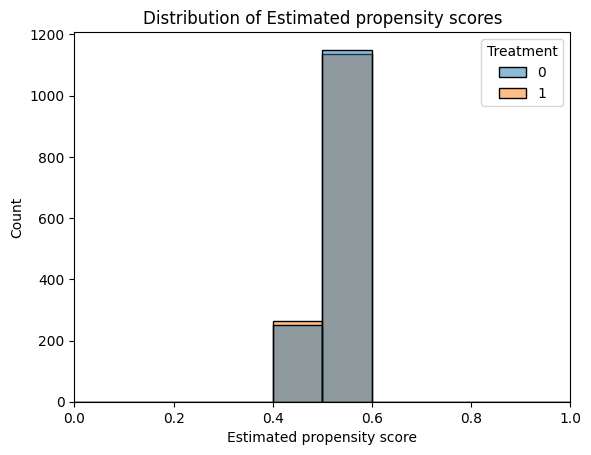

In [94]:
#傾向スコア推定値の可視化
ax = sns.histplot(
    data=df, x="ps_hat", hue="T",
    bins=np.arange(0, 1.1, 0.1), common_norm=False
)

plt.xlim(0, 1)
plt.xticks(np.linspace(0, 1, 6))  # 0.0, 0.2, ..., 1.0
plt.title("Distribution of Estimated propensity scores")
plt.xlabel("Estimated propensity score")
ax.legend_.set_title("Treatment")
plt.show()


ATE推定量の実装：
*   IPW（Horvitz–Thompson型）
*   IPW（Hajek型）
*   G-computation
*   AIPW






In [95]:
results = {}

In [96]:
#単純比較
mean_treat = df.loc[df["T"]==1, "Y"].mean()
mean_control = df.loc[df["T"]==0, "Y"].mean()
ate_naive = mean_treat - mean_control

results["Naive"] = ate_naive
print("ATE (Naive Difference):", results["Naive"])

ATE (Naive Difference): 348.29357142857043


In [97]:
# IPW推定量
#df["w_ipw_treat"] = df["T"] / ps_hat
#df["w_ipw_control"] = (1 - df["T"]) / (1 - ps_hat)
#df["ate_hat_ipw"] = df["w_ipw_treat"]  * df["Y"] - df["w_ipw_control"] * df["Y"]

# IPW推定量： Horvitz–Thompson型（HT型）
df["ate_hat_ipw_HT"]  = df["T"]*df["Y"]/df["ps_hat"] - (1-df["T"])*df["Y"]/(1-df["ps_hat"])
results["IPW_HT"] = df["ate_hat_ipw_HT"].mean()
#results["IPW"] = df["ate_hat_ipw"].mean()
#results["Emp_SD_IPW"]= np.std(df["ate_hat_ipw"])

print("ATE (IPW_HT):",results["IPW_HT"])
#print("Emp_SD (IPW):", results["Emp_SD_IPW"])


ATE (IPW_HT): -593.0684287637047


In [98]:
#IPW推定量： Hajek型
df["w_ipw_treat_h"] = df["T"] / df["ps_hat"]
df["w_ipw_control_h"] = (1 - df["T"]) / (1 - df["ps_hat"])
num1 = (df["w_ipw_treat_h"] * df["Y"]).sum()
den1 = df["w_ipw_treat_h"].sum()
num0 = (df["w_ipw_control_h"] * df["Y"]).sum()
den0 = df["w_ipw_control_h"].sum()

ate_hat_ipw_H = (num1/den1) - (num0/den0)
results["IPW_H"] = ate_hat_ipw_H
print("ATE (IPW_h):", results["IPW_H"] )

ATE (IPW_h): 195.3976389725285


In [99]:
# G-computation推定量

df["ate_hat_gcomp"] = df["mu1"] - df["mu0"]
results["G-computation"] = df["ate_hat_gcomp"].mean()
#results["Emp_SD_G-comp"]= np.std(df["ate_hat_gcomp"])

print("ATE (G-computation, RF):", results["G-computation"])
#print("Emp_SD (G-computation, RF):", results["Emp_SD_G-comp"])

ATE (G-computation, RF): 13.642562571357319


In [100]:
# AIPW（Doubly Robust）推定量
df["aipw_term_1"]= (df["T"]*df["Y"] / df["ps_hat"]) - ((df["T"]-df["ps_hat"])*df["mu1"]/df["ps_hat"])
df["aipw_term_0"]=((1-df["T"])*df["Y"] / (1-df["ps_hat"])) + ((df["T"]-df["ps_hat"])*df["mu0"]/(1-df["ps_hat"]))

ate_hat_aipw = df["aipw_term_1"].mean() - df["aipw_term_0"].mean()
results["AIPW"] = ate_hat_aipw
print("ATE (AIPW):", results["AIPW"] )

ATE (AIPW): 273.4600691687083


In [101]:
df_ATE_result = pd.DataFrame(results, index=[0])
df_ATE_result

,Naive,IPW_HT,IPW_H,G-computation,AIPW
0,348.293571,-593.068429,195.397639,13.642563,273.460069


重み付き前後のSMDの出力

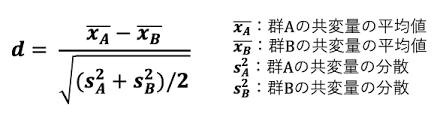

In [102]:
def compute_smd(df, covariates, treatment, weights=None):
    smd_list = {}
    for cov in covariates:
        # 重みなし
        if weights is None:
            mean_treat = df.loc[df[treatment]==1, cov].mean()
            mean_control = df.loc[df[treatment]==0, cov].mean()
            var_treat = df.loc[df[treatment]==1, cov].var()
            var_control = df.loc[df[treatment]==0, cov].var()
        #重みあり
        else:
            w = weights
            mean_treat = np.average(df.loc[df[treatment]==1, cov], weights=w[df[treatment]==1])
            mean_control = np.average(df.loc[df[treatment]==0, cov], weights=w[df[treatment]==0])
            var_treat = np.average((df.loc[df[treatment]==1, cov]-mean_treat)**2, weights=w[df[treatment]==1])
            var_control = np.average((df.loc[df[treatment]==0, cov]-mean_control)**2, weights=w[df[treatment]==0])
        # SMD
        smd = (mean_treat - mean_control) / np.sqrt((var_treat + var_control)/2)
        smd_list[cov] = smd
    return smd_list

In [103]:
#重みとSMDの計算
# Unweighted
smd_unweighted = compute_smd(df, X_cols, "T")

# IPW_HT
w_ipw_HT = df["T"]/df["ps_hat"] + (1-df["T"])/(1-df["ps_hat"])
smd_ipw_HT = compute_smd(df, X_cols, "T", weights=w_ipw_HT)

# IPW_H
w1 = df["T"]/df["ps_hat"]; w0 = (1-df["T"])/(1-df["ps_hat"])
w_ipw_H = np.where(df["T"]==1, w1/w1.sum(), w0/w0.sum())
smd_ipw_H = compute_smd(df, X_cols, "T", weights=w_ipw_H)

#格納
smd_df = pd.DataFrame({
    "Unweighted": smd_unweighted,
    "IPW-HT": smd_ipw_HT,
    "IPW-H": smd_ipw_H
}).T

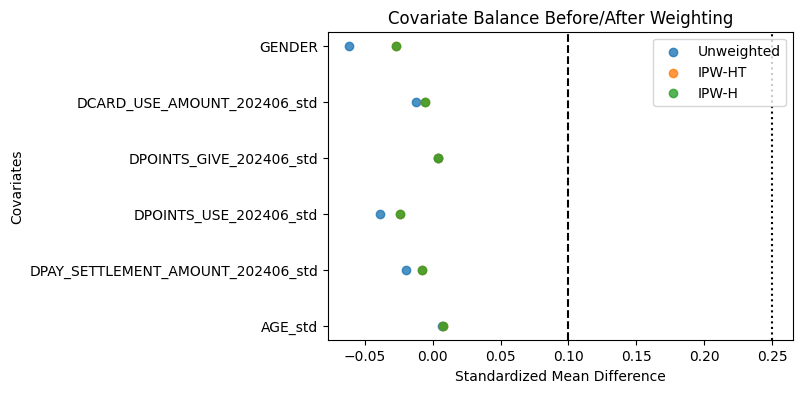

In [104]:
plt.figure(figsize=(6,4))
for method in smd_df.index:
    plt.scatter(smd_df.loc[method].values, smd_df.columns, label=method, alpha=0.8)
plt.axvline(0.1, color="k", linestyle="--")  # SMD=0.1基準
plt.axvline(0.25, color="k", linestyle=":")
plt.xlabel("Standardized Mean Difference")
plt.ylabel("Covariates")
plt.legend()
plt.title("Covariate Balance Before/After Weighting")
plt.show()